In [213]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
import upsetplot
import janitor
import missingno

import pyreadr

#import session_info
from extenciones import Utils2 as ut
from extencioness import MissingMethods as ms

Aspecto general

In [214]:
%matplotlib inline
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")

In [215]:
#carga de datos
dataset = ut.load_from_csv(ut , "churn.csv")

# Generalidades

In [216]:
# cantidad de valores
print(F"""

tenemos : {dataset.shape[0]} filas y 
tenemos : {dataset.shape[1]} columnas

""")



tenemos : 7043 filas y 
tenemos : 33 columnas




Revision tipos de datos

In [217]:
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Revision valores nullos

Se amplia libreria de pandas para hacer la exploración

In [218]:
# numero total de faltantes 
dataset.missing.number_missing()

5185

In [219]:
# exploramos en cuales variables nos faltaron elementos
dataset.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,CustomerID,0,7043,0.000000
1,Count,0,7043,0.000000
2,Country,0,7043,0.000000
3,State,0,7043,0.000000
4,City,0,7043,0.000000
5,Zip Code,0,7043,0.000000
6,Lat Long,0,7043,0.000000
7,Latitude,0,7043,0.000000
8,Longitude,0,7043,0.000000
9,Gender,0,7043,0.000000


In [220]:
# cantidad de valores faltantes
dataset.missing.missing_variable_run(
    variable="Churn Reason")


,run_length,is_na
0,1869,complete
1,5174,missing


In [221]:
# el porcentaje de datos nullos vs datos reales
dataset.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,31,93.939394
1,11,1,3.030303
2,5174,1,3.030303


In [222]:
# analizamos la distribucion de los datos faltantes 
dataset.missing.missing_variable_span(
        variable="Churn Reason",
        span_every=1000)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,1000,0.0,100.0
1,1,131,869,13.1,86.9
2,2,1000,0,100.0,0.0
3,3,1000,0,100.0,0.0
4,4,1000,0,100.0,0.0
5,5,1000,0,100.0,0.0
6,6,1000,0,100.0,0.0
7,7,43,0,100.0,0.0


Observamamos que a simple vista estan distribuidos en funcion de orden, la hipotesiss es que son los datos de los clientes que siguen activos en la empresa

<AxesSubplot: >

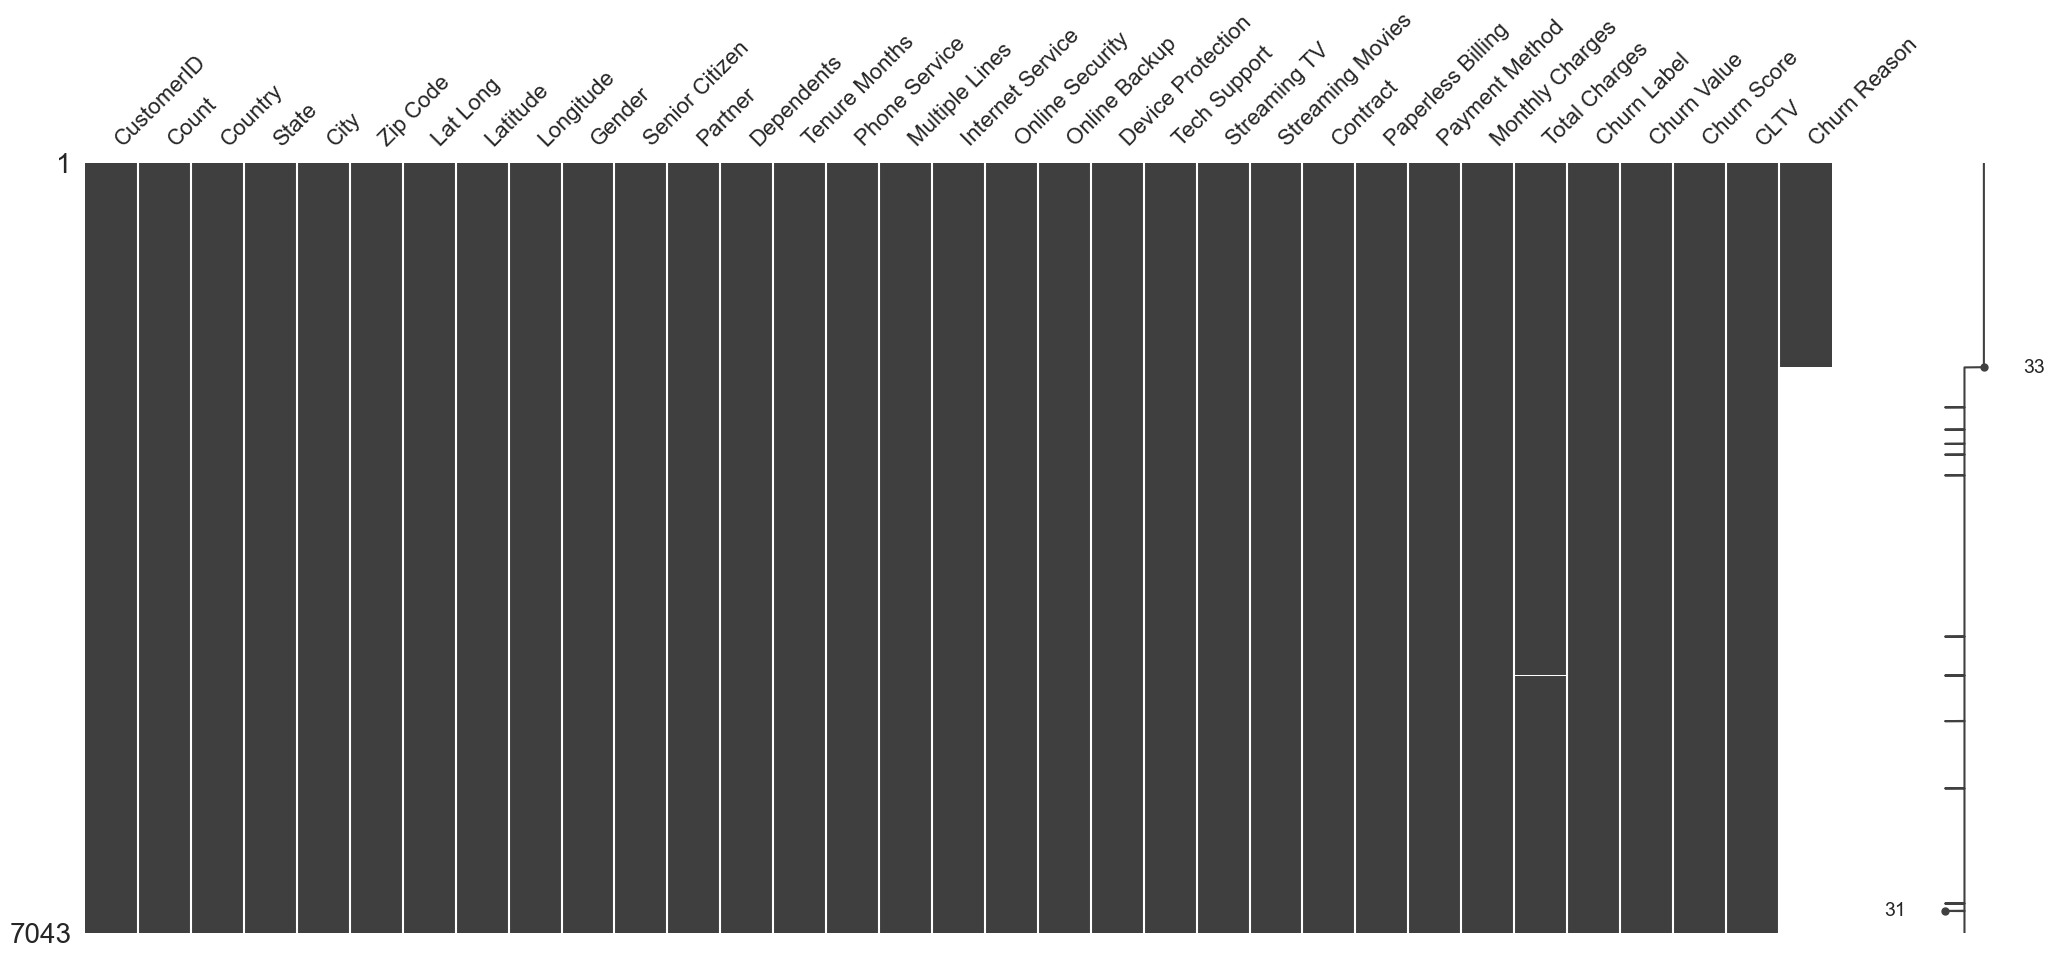

In [223]:
# revisamos de manera visual
missingno.matrix(df= dataset)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

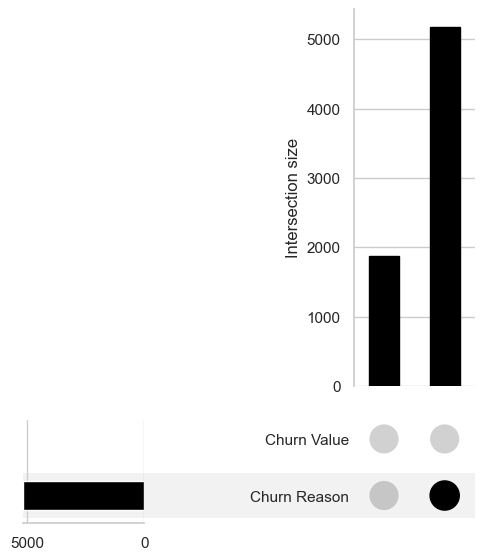

In [224]:
dataset.missing.missing_upsetplot(
    variables = ["Churn Reason", "Churn Value"], 
    element_size = 60, 
)

# Imputacion a valores nullos de Reason Churn 

Sabenmos que los valores que faltan derivan de las variables, dado que esa información solo falta cuando un cliente no se fue, y el que un cliete se valla depende de los atributos que se analizaran posteriormente, los datos entran en  la clasificación << MNAR >> : 

La ausencia de valores está relacionada con otras variables en el conjunto de datos, lo que significa que no se produce de forma aleatoria. 

In [225]:
# hacemos la copia de seguridad
dataset_t = dataset.copy(deep=True)

In [226]:
# llenamos los faltantres con la etiqueta cliente activo
dataset_t["Churn Reason"] = dataset_t["Churn Reason"].fillna("cliente_activo")

In [227]:
dataset_t = dataset_t.dropna(axis = "rows")

In [228]:
#comprobamos que se ayan llenado
print(f"""
numeros totales de faltantes : {

}
numero de faltantes churn reason {dataset_t["Churn Reason"].isna().sum()} 
""")


numeros totales de faltantes : 0
numero de faltantes churn reason 0 



<AxesSubplot: >

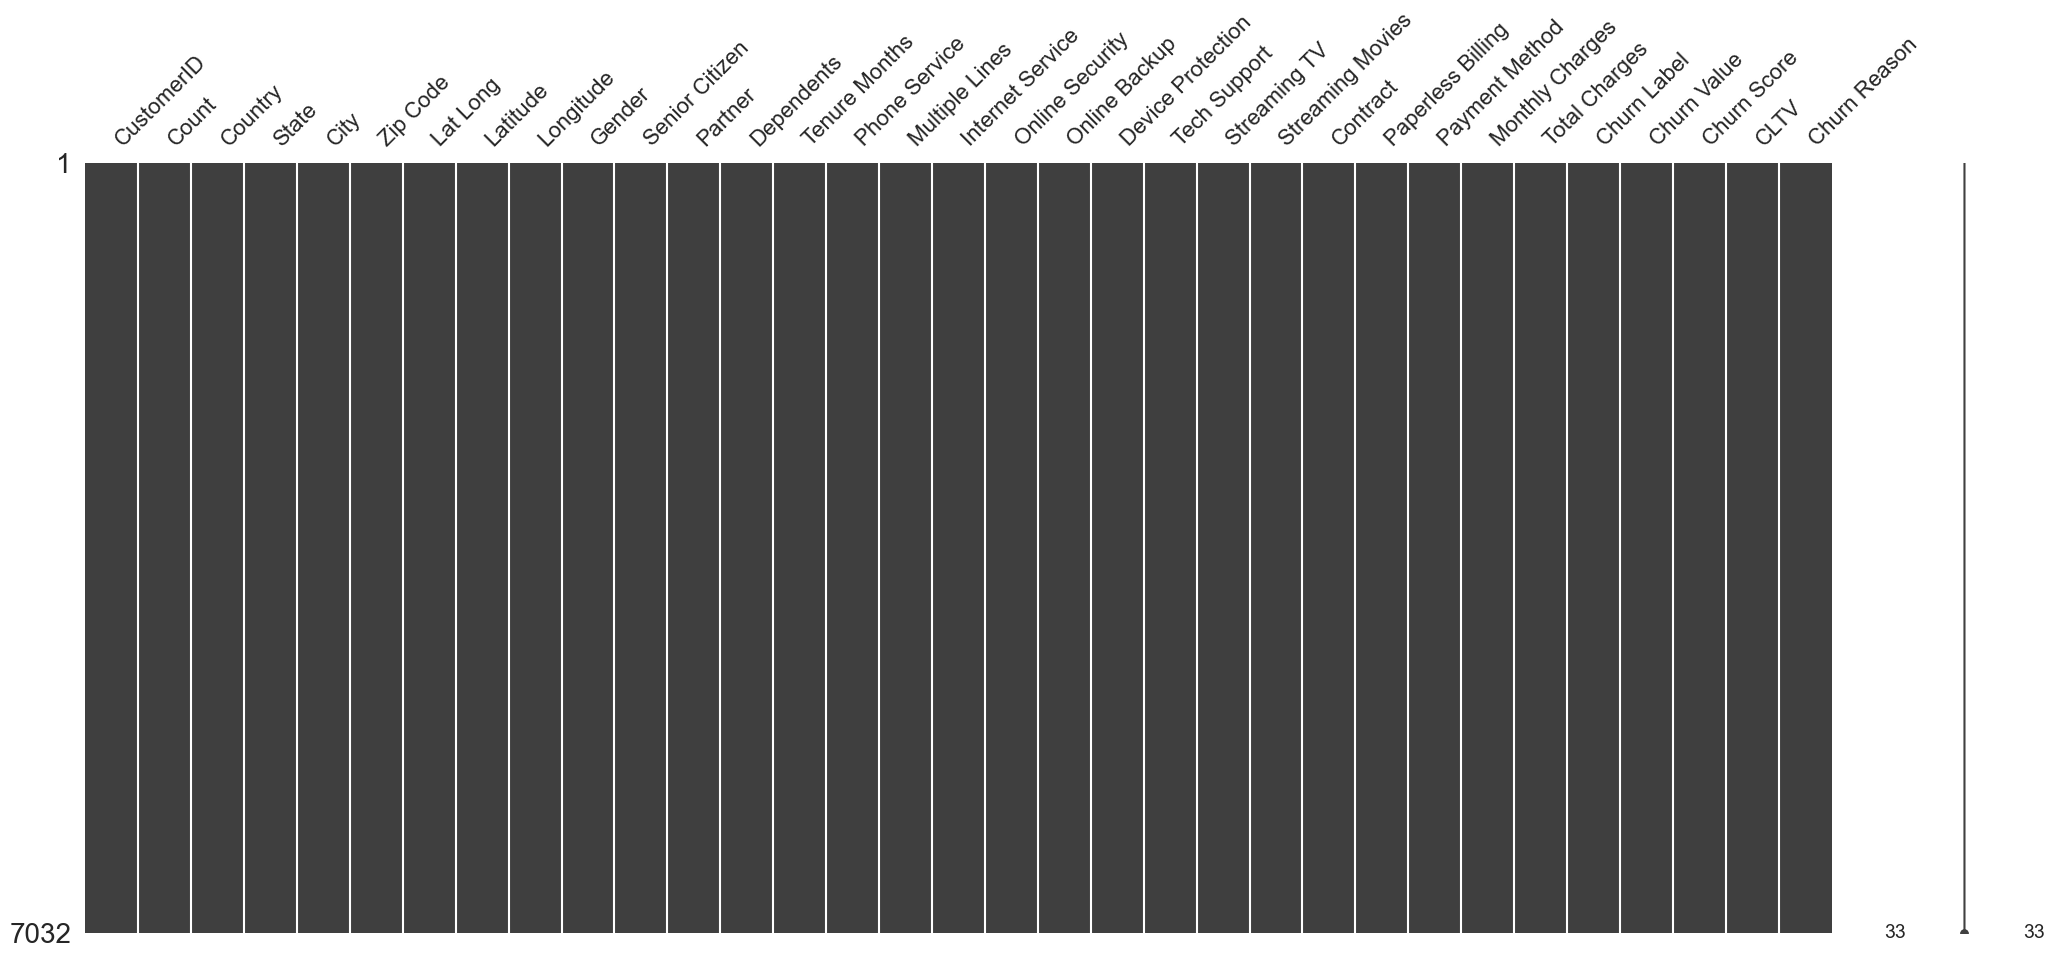

In [229]:
# al contrario que la misma tabla anterior tenemos toos los valores llenos
missingno.matrix(df= dataset_t)

# Eliminacion variables no trascendentes

Para mejor optimizacin eliminaremos las varibales que no son tracendentes para el analisis y dejaremos las quie nos proporcioan informacion de valor para el analisis  primer filtro son las etiquetas 

Filtraremos solo las variables con las que trabajaremos

In [230]:
dataset_E = dataset_t.copy(deep = True)

veamos cuantos valores unicos tenemos por variables

In [231]:
dataset_E.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


In [232]:
# city no dumies

In [233]:
datafil = dataset_E.drop(columns=["CustomerID" , "Country", "State","Count" , "Zip Code" , "Lat Long" , "Latitude",  "Longitude" ,"Churn Label",

])

Cambios de tipo de datos

Tratamiento de datos categoricos

In [234]:
datadum = datafil.copy(deep = True)

Datos para Analisis exploratorio

In [235]:
#datadum.to_csv("data_exploratoria.csv")

In [236]:
datadum.head(3)

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372,Moved


In [237]:
yesnot = ["Senior Citizen" , "Gender", "Partner", "Dependents", 
"Phone Service" , "Multiple Lines", "Online Security" , "Online Backup" , "Device Protection" , "Tech Support" ,
"Streaming TV" , "Contract","Paperless Billing","Internet Service", "Streaming Movies"

]

In [238]:
dataset_E["Payment Method"].unique().sum()

'Mailed checkElectronic checkBank transfer (automatic)Credit card (automatic)'

In [239]:
datadumies = pd.get_dummies(datadum, columns= yesnot, drop_first=True )

In [240]:
datadumies

,City,Tenure Months,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Senior Citizen_Yes,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Internet Service_Fiber optic,Internet Service_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,Los Angeles,2,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,0,...,0,0,0,0,0,1,0,0,0,0
1,Los Angeles,2,Electronic check,70.70,151.65,1,67,2701,Moved,0,...,0,0,0,0,0,1,1,0,0,0
2,Los Angeles,8,Electronic check,99.65,820.50,1,86,5372,Moved,0,...,0,0,1,0,0,1,1,0,0,1
3,Los Angeles,28,Electronic check,104.80,3046.05,1,84,5003,Moved,0,...,1,0,1,0,0,1,1,0,0,1
4,Los Angeles,49,Bank transfer (automatic),103.70,5036.30,1,89,5340,Competitor had better devices,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,72,Bank transfer (automatic),21.15,1419.40,0,45,5306,cliente_activo,0,...,0,1,0,0,1,1,0,1,1,0
7039,Adelanto,24,Mailed check,84.80,1990.50,0,59,2140,cliente_activo,0,...,1,0,1,1,0,1,0,0,0,1
7040,Amboy,72,Credit card (automatic),103.20,7362.90,0,71,5560,cliente_activo,0,...,0,0,1,1,0,1,1,0,0,1
7041,Angelus Oaks,11,Electronic check,29.60,346.45,0,59,2793,cliente_activo,0,...,0,0,0,0,0,1,0,0,0,0


In [241]:
datadumies.head(3)

,City,Tenure Months,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Senior Citizen_Yes,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Internet Service_Fiber optic,Internet Service_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,Los Angeles,2,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,0,...,0,0,0,0,0,1,0,0,0,0
1,Los Angeles,2,Electronic check,70.70,151.65,1,67,2701,Moved,0,...,0,0,0,0,0,1,1,0,0,0
2,Los Angeles,8,Electronic check,99.65,820.50,1,86,5372,Moved,0,...,0,0,1,0,0,1,1,0,0,1


Normalizacion de variables para modelo

In [242]:
# datadumies.to_csv("churn_modeloListo.csv")

In [243]:
datadumies.columns

Index(['City', 'Tenure Months', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'Senior Citizen_Yes', 'Gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes'],
      dtype='object')

In [262]:
modelo_data = datadumies.copy(deep = True)
modelo_data = modelo_data.drop(columns="City")
modeloOne = pd.get_dummies(modelo_data, drop_first=  True )
#modeloOne.to_csv("dataML")